In [21]:
#Import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")

In [22]:
#Load

df = pd.read_csv('data/ks-projects-201801.csv')

In [23]:
df.head()

#This dataset mainly has defining categorical data and good set of time and currency information

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [24]:
#Let's dig a little deeper

df.info()

#Okay, so most of the data is in objects, and float, in close second with int data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [25]:
df.describe()

#Okay, all higher order numbers, with backers being only in normally countable format

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


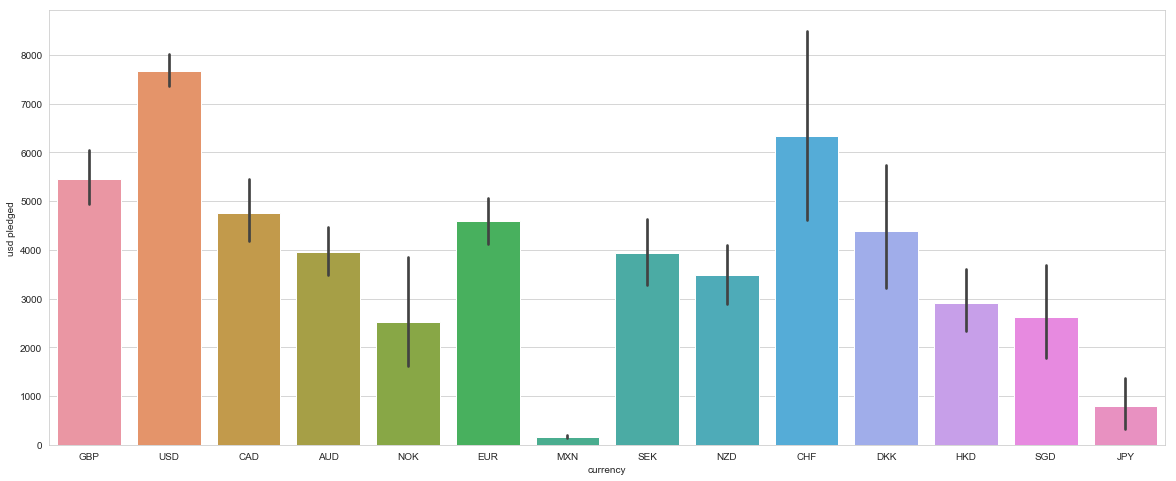

In [26]:
#Let's check individual categorical information

plt.rcParams['figure.figsize']=(20,8)

sns.barplot(x="currency",y="usd pledged",data=df)

#We can see USD, CHF and GBP are most currencies the goals are pledged.

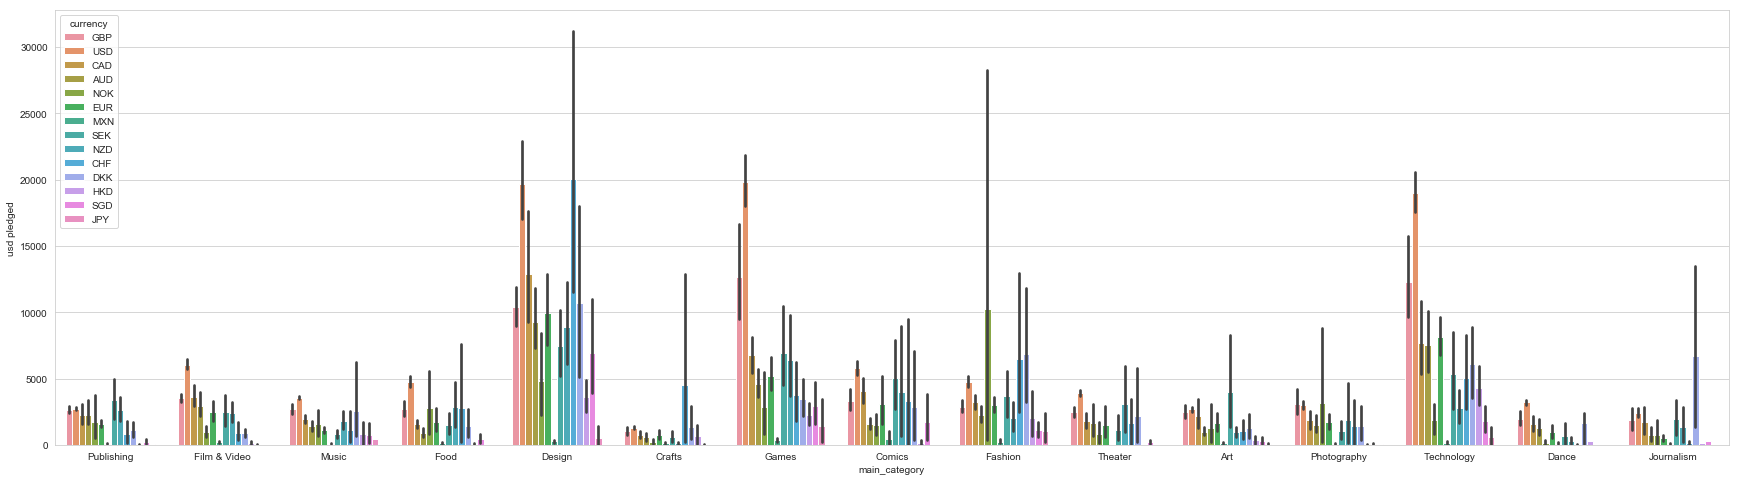

In [27]:
plt.rcParams['figure.figsize']=(30,8)

sns.barplot(x="main_category",y="usd pledged",data=df, hue="currency")


#Main category wise split between pledges, as we can see only few cayegories have pledged funds like Design, Technology, Fashion and Games.

In [28]:
df['category'].value_counts().head(10)

#Top 10 categories by number of projects

Product Design    22314
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
Video Games       11830
Food              11493
Film & Video      10108
Fiction            9169
Fashion            8554
Name: category, dtype: int64

In [29]:
df['main_category'].value_counts().head(10)

#Top 10 main categories by number of projects

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Name: main_category, dtype: int64

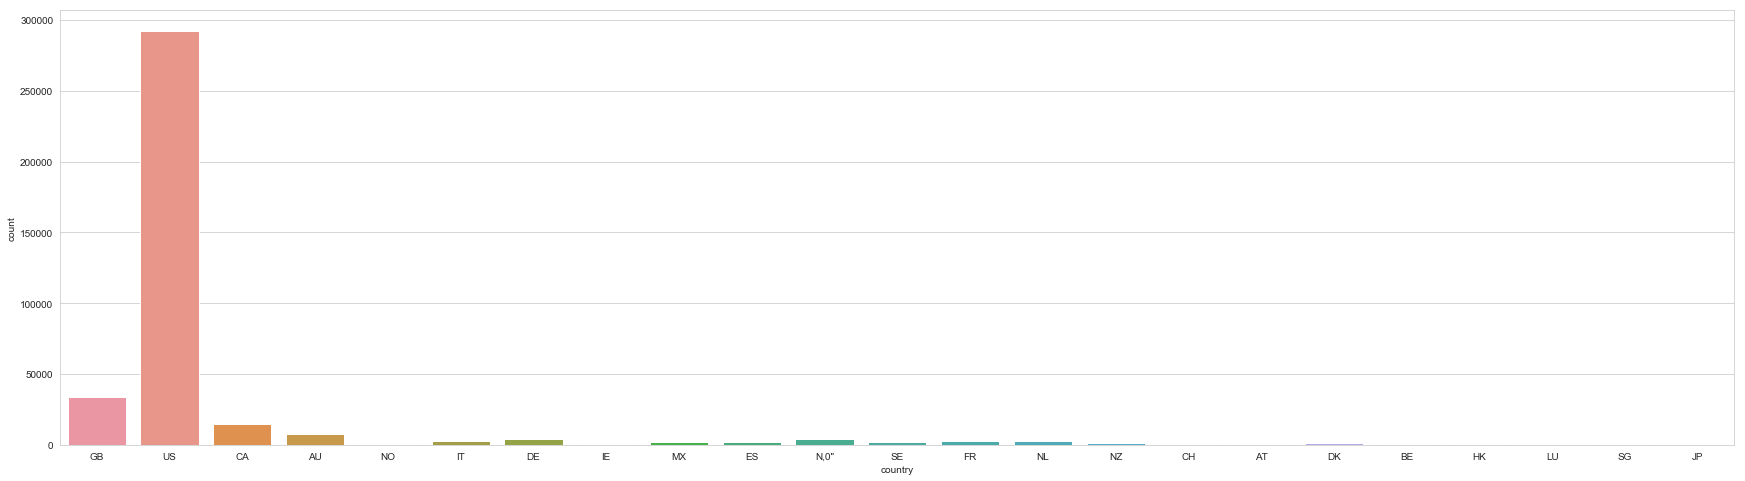

In [30]:
sns.countplot(x="country",data=df)

#Number of projects by each country

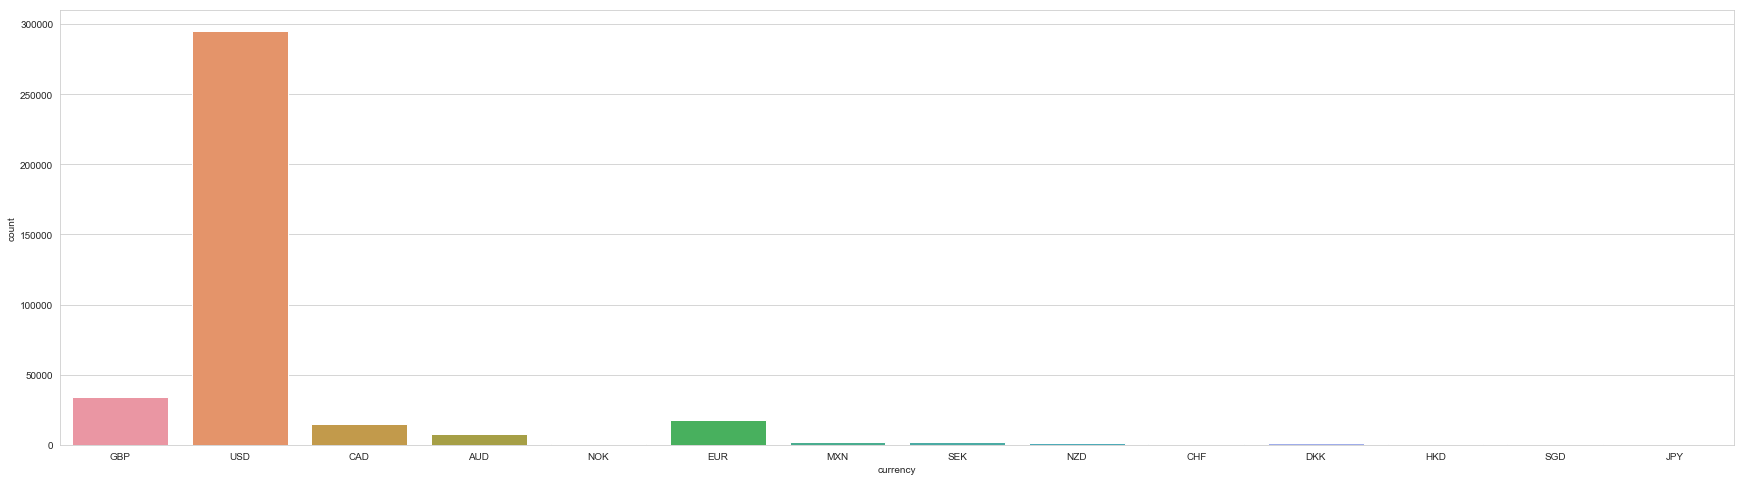

In [31]:
sns.countplot(x="currency",data=df)

#Number of projects by each country

#NOTE: There is a strong relation between Country and Currencies

In [32]:
df_c = df[['name','country','category','usd pledged']].sort_values('usd pledged',ascending=False).head(10)
df_c

#Top 10 pledged project names

,name,country,category,usd pledged
157270,"Pebble Time - Awesome Smartwatch, No Compromises",US,Product Design,20338986.27
250254,COOLEST COOLER: 21st Century Cooler that's Act...,US,Product Design,13285226.36
216629,"Pebble 2, Time 2 + All-New Pebble Core",US,Product Design,12779843.49
282416,Pebble: E-Paper Watch for iPhone and Android,US,Product Design,10266845.74
293861,The World's Best TRAVEL JACKET with 15 Feature...,US,Product Design,9192055.66
187652,Exploding Kittens,US,Tabletop Games,8782571.99
6665,OUYA: A New Kind of Video Game Console,US,Gaming Hardware,8596474.58
368573,Shenmue 3,US,Video Games,6333295.77
30041,Pono Music - Where Your Soul Rediscovers Music,US,Sound,6225354.98
89481,Bring Back MYSTERY SCIENCE THEATER 3000,US,Television,5764229.38


In [33]:
df_c2 = df[['name','country','category','backers']].sort_values('backers',ascending=False).head(10)
df_c2

#Top 10 backed projects

,name,country,category,backers
187652,Exploding Kittens,US,Tabletop Games,219382
75900,Fidget Cube: A Vinyl Desk Toy,US,Product Design,154926
292244,"Bring Reading Rainbow Back for Every Child, Ev...",US,Web,105857
148585,The Veronica Mars Movie Project,US,Narrative Film,91585
182657,Double Fine Adventure,US,Video Games,87142
23404,Bears vs Babies - A Card Game,US,Tabletop Games,85581
157270,"Pebble Time - Awesome Smartwatch, No Compromises",US,Product Design,78471
239175,Torment: Tides of Numenera,US,Video Games,74405
272924,Project Eternity,US,Video Games,73986
38291,Yooka-Laylee - A 3D Platformer Rare-vival!,GB,Video Games,73206


In [34]:
df_c3 = df[['name','country','category','launched']].sort_values('launched',ascending=False).tail(10)
df_c3

#Oldest 10 kickstarter projects

,name,country,category,launched
138572,drawing for dollars,US,Illustration,2009-04-24 21:52:03
322000,CRYSTAL ANTLERS UNTITLED MOVIE,US,Shorts,2009-04-23 00:07:53
169268,Grace Jones Does Not Give A F$#% T-Shirt (limi...,US,Fashion,2009-04-21 21:02:48
48147,1st Super-Size Painting - Social Network Owned...,US,Art,1970-01-01 01:00:00
2842,Salt of the Earth: A Dead Sea Movie (Canceled),US,Film & Video,1970-01-01 01:00:00
247913,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",US,Music,1970-01-01 01:00:00
319002,Student Auditions Music 2015,CH,Publishing,1970-01-01 01:00:00
273779,Identity Communications Infographic (Canceled),US,Design,1970-01-01 01:00:00
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",US,Theater,1970-01-01 01:00:00
75397,"""ICHOR"" (Canceled)",US,Film & Video,1970-01-01 01:00:00


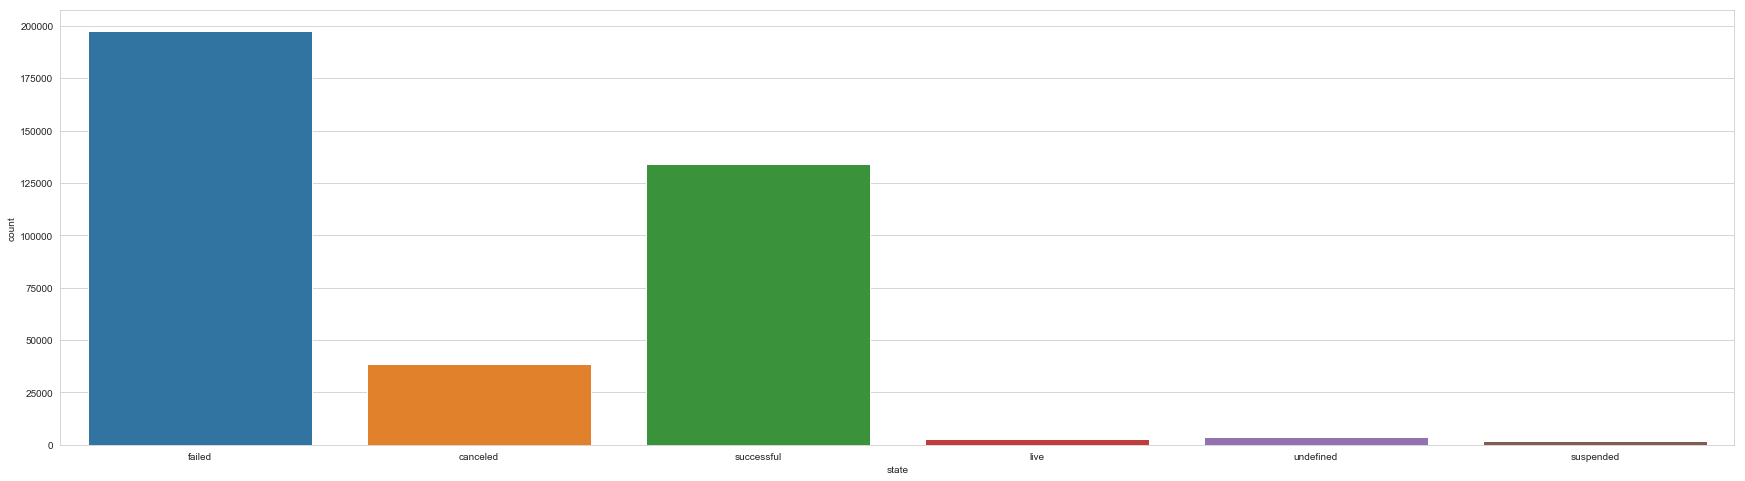

In [35]:
sns.countplot(x="state",data=df)

#Status of all projects

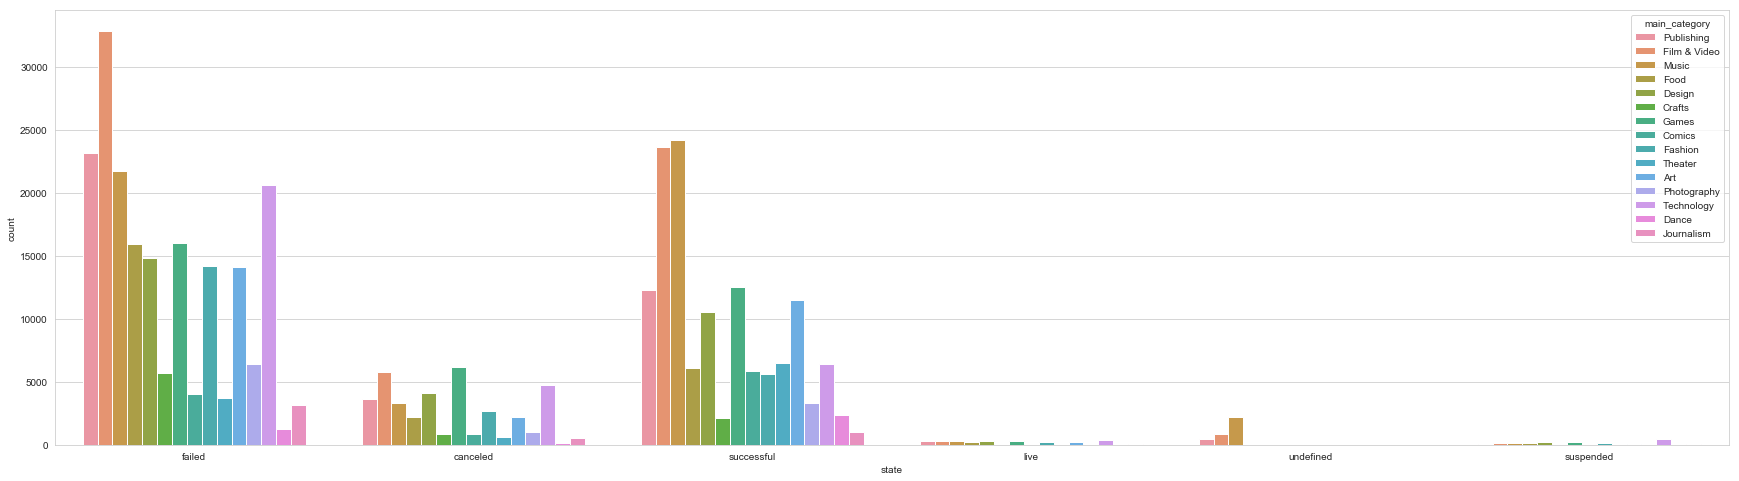

In [36]:
sns.countplot(x="state",data=df, hue="main_category")

#Most failed are related to Technology, Film/Video, & Publishing.

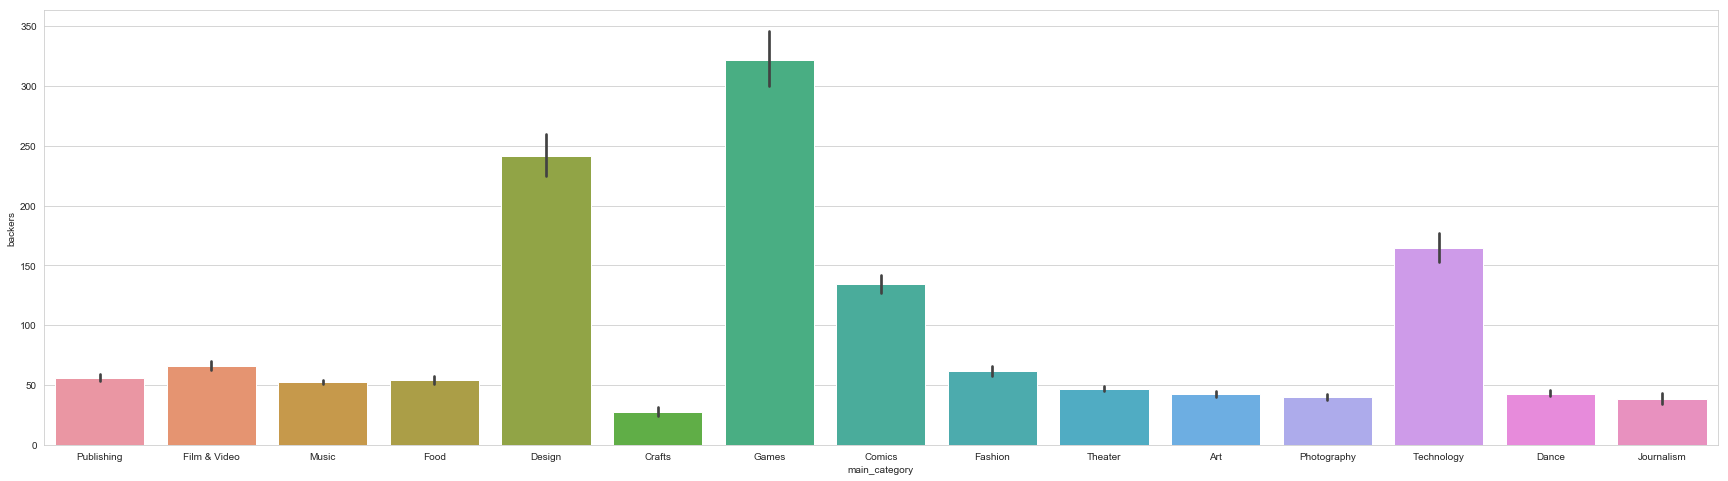

In [37]:
plt.rcParams['figure.figsize']=(30,8)

sns.barplot(x="main_category",y="backers",data=df)

#Category wise split for most backers - Games, Design and Technology have most backers

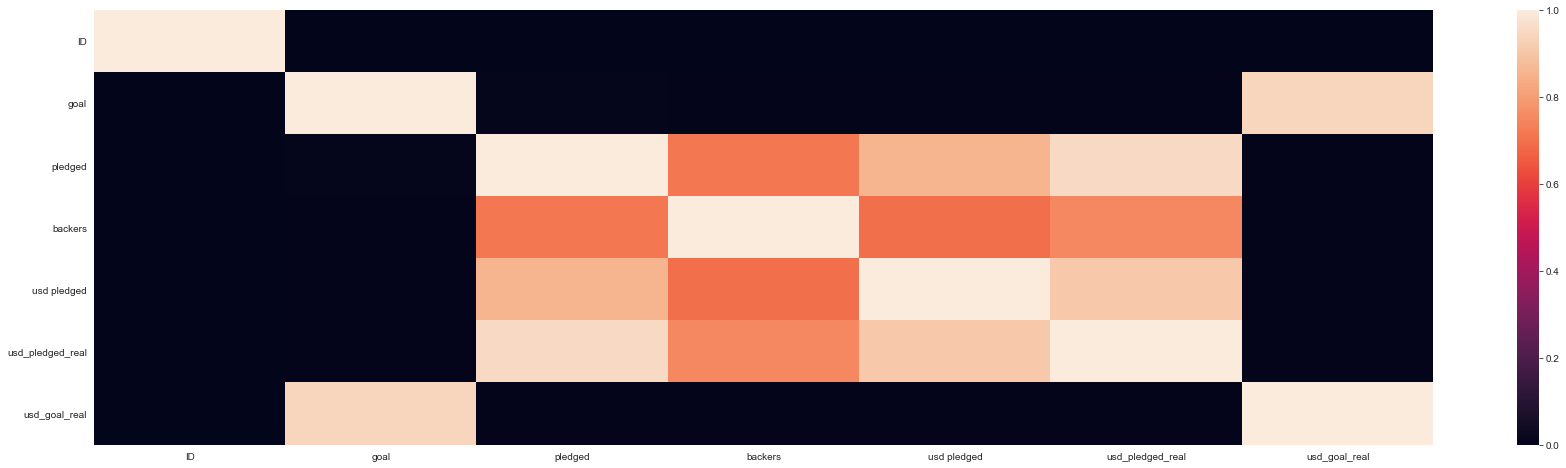

In [38]:
sns.heatmap(df.corr(),)

#correlation behaviour between categories